In [3]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating Plots Using Python and Matplotlib

In [37]:
data = pd.read_csv('got.csv')
data.head()

Joffrey/Tommen Baratheon    13
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64


In [42]:
# Creating a series for # of Times Each King was Attacker/Defender

data = data.dropna(subset=['attacker_king','defender_king'])
attacker_king = data['attacker_king'].value_counts()
defender_king = data['defender_king'].value_counts()
defender_king

Robb Stark                  14
Joffrey/Tommen Baratheon    13
Balon/Euron Greyjoy          4
Stannis Baratheon            2
Mance Rayder                 1
Renly Baratheon              1
Name: defender_king, dtype: int64

<IPython.core.display.Javascript object>


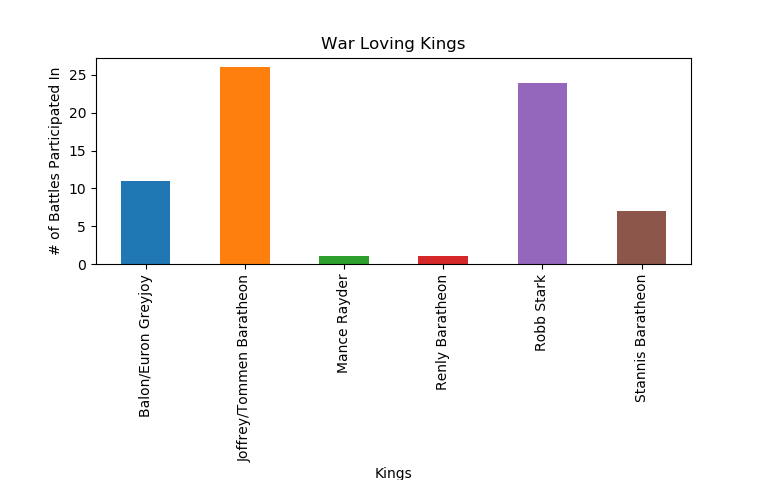

In [62]:
# Adding the two Series together and creating a bar graph

total = attacker_king.add(defender_king, fill_value=0)
total.plot(kind='bar')
plt.title('War Loving Kings')
plt.xlabel('Kings')
plt.ylabel('# of Battles Participated In')
plt.subplots_adjust(bottom=0.45)

In [85]:
data = pd.read_csv('trip.csv')
data.head()

C:\Users\ktorres\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [89]:
# Adding up all the Bike Trips by Gender and Removing a Value That shouldn't be included

data = data[data.gender != 'stoptime']
gender = data['gender'].value_counts()
print(gender)

Male      140564
Female     37562
Other       3431
Name: gender, dtype: int64


<IPython.core.display.Javascript object>


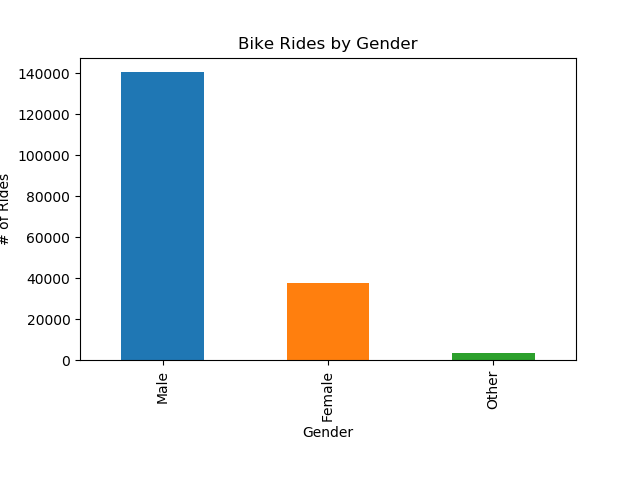

In [101]:
gender.plot(kind='bar')
plt.title('Bike Rides by Gender')
plt.xlabel('Gender')
plt.ylabel('# of Rides')
plt.subplots_adjust(bottom=0.25)

<IPython.core.display.Javascript object>


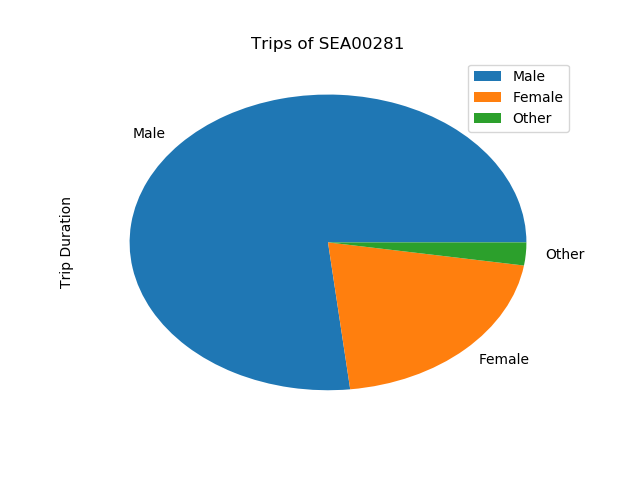

In [103]:
#  Creating a Pie Chart for Gender for Bike SEA00281

one_ride = data[data['bikeid'] == 'SEA00281']
one_ride = one_ride['gender'].value_counts()
one_ride.plot(kind='pie',title='Trips of SEA00281')
plt.ylabel('Trip Duration')
plt.legend()
plt.show()

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

                    car name  
0  chevrolet chevelle malibu  
1          buick skylark 320  
2         plymouth satellite  
3              amc rebel sst  
4                ford torino  


<IPython.core.display.Javascript object>


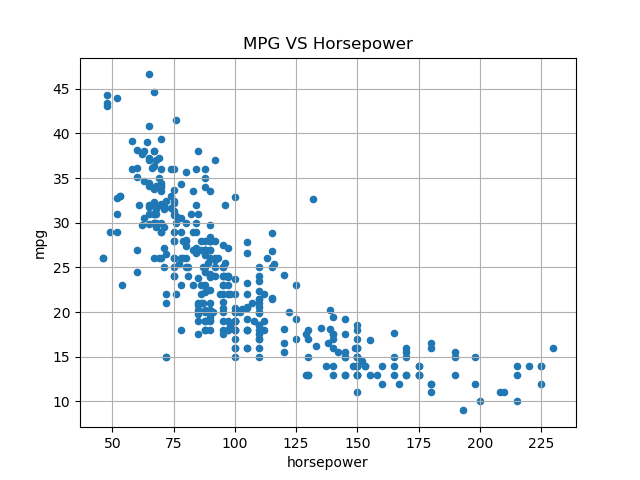

In [183]:
# Cleaning the DataFrame from unwanted values and Selecting two columns to plot

data = pd.read_csv('mpg.csv')
del data['origin']
data = data[data.horsepower != '?']
print(data.head())
data['horsepower'] = pd.to_numeric(data['horsepower'])
data.plot(kind='scatter',y='mpg',x='horsepower',title='MPG VS Horsepower',grid=True)

In [160]:
# Merging together 4 Different Datasets 

w2013 = pd.read_csv('WWE-Data-2013.csv')
w2014 = pd.read_csv('WWE-Data-2014.csv')
w2015 = pd.read_csv('WWE-Data-2015.csv')
w2016 = pd.read_csv('WWE-Data-2016.csv')
w1314 = pd.merge(w2013,w2014,on='Wrestler')

w1314 = w1314.rename(index=str,columns={'Wins_x':'Wins 2013','Losses_x':'Losses 2013','Draws_x':'Draws 2013','Wins_y':'Wins 2014'
                                    ,'Losses_y':'Losses 2014','Draws_y':'Draws 2014'})
w1516 = pd.merge(w2015,w2016,on='Wrestler')
w1516 = w1516.rename(index=str,columns={'Wins_x':'Wins 2015','Losses_x':'Losses 2015','Draws_x':'Draws 2015','Wins_y':'Wins 2016'
                                    ,'Losses_y':'Losses 2016','Draws_y':'Draws 2016'})
all_data = pd.merge(w1314,w1516,on='Wrestler')
print(all_data.head())

       Wrestler  Wins 2013  Losses 2013  Draws 2013  Wins 2014  Losses 2014  \
0  Dean Ambrose         70          134           4        129           36   
1  Seth Rollins         50          150           4         87          105   
2   Randy Orton        129           63           8         33           87   
3  Roman Reigns         49          140           5        118           28   
4        Ryback        103           88           3         43          114   

   Draws 2014  Wins 2015  Losses 2015  Draws 2015  Wins 2016  Losses 2016  \
0           2        150           63           5        133           67   
1           4         51          124           1         39           75   
2           5         81           10           1         39           21   
3           4        187           19           7        142           12   
4           1        138           34           2         37           17   

   Draws 2016  
0           4  
1           4  
2           0 

In [178]:
# Creating New Calculated Columns and a DataFrame With Total Matches above 100/More than 1 Win in 2016 and 2013

all_data = all_data.fillna(0)
all_data['Total Wins'] = all_data.loc[:,['Wins 2013','Wins 2014','Wins 2015','Wins 2016']].sum(axis=1)
all_data['Total Losses'] = all_data.loc[:,['Losses 2013','Losses 2014','Losses 2015','Losses 2016']].sum(axis=1)
all_data['Total Draws'] = all_data.loc[:,['Draws 2013','Draws 2014','Draws 2015','Draws 2016']].sum(axis=1)
all_data['Total Matches'] = all_data.loc[:,['Total Wins','Total Losses','Total Draws']].sum(axis=1)

over_hund = all_data.loc[(all_data['Total Matches']>=100) & (all_data['Wins 2013']>0)& (all_data['Wins 2016']>0)]
all_data = all_data.set_index('Wrestler')
all_data.head()

,Wins 2013,Losses 2013,Draws 2013,Wins 2014,Losses 2014,Draws 2014,Wins 2015,Losses 2015,Draws 2015,Wins 2016,Losses 2016,Draws 2016,Total Wins,Total Losses,Total Draws,Total Matches
Wrestler,,,,,,,,,,,,,,,,
Dean Ambrose,70,134,4,129,36,2,150,63,5,133,67,4,482,300,15,797
Seth Rollins,50,150,4,87,105,4,51,124,1,39,75,4,227,454,13,694
Randy Orton,129,63,8,33,87,5,81,10,1,39,21,0,282,181,14,477
Roman Reigns,49,140,5,118,28,4,187,19,7,142,12,5,496,199,21,716
Ryback,103,88,3,43,114,1,138,34,2,37,17,1,321,253,7,581


<IPython.core.display.Javascript object>


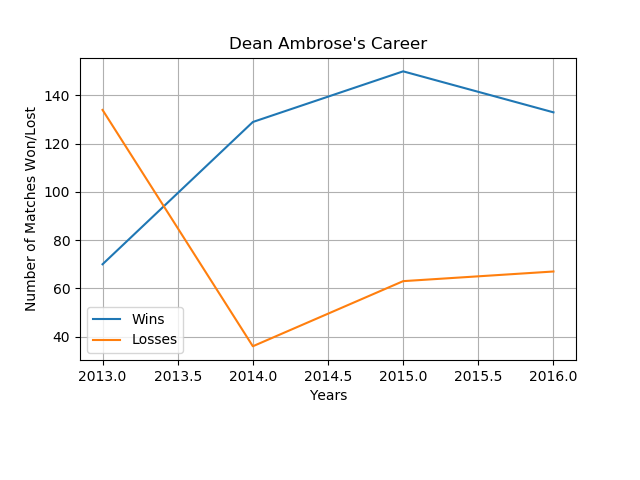

In [228]:
#Allows user to input a Wrestler's name and will chart their wins and losses from 2013 to 2016

name = input("What Wrestler's career would you like to see? ")

wins = all_data.loc[name,['Wins 2013','Wins 2014','Wins 2015','Wins 2016']]
loss = all_data.loc[name,['Losses 2013','Losses 2014','Losses 2015','Losses 2016']]

years = [2013,2014,2015,2016]

plt.plot(years,wins,label='Wins')
plt.plot(years,loss,label='Losses')

plt.title(name+"'s Career")
plt.legend()
plt.grid()
plt.xlabel('Years')
plt.ylabel('Number of Matches Won/Lost')
plt.subplots_adjust(bottom=0.25)
